In [ ]:
#MLP 구현을 위한 모듈 선언
import torch
import torch.nn as nn
import torchvision.datasets as dataset
import torchvision.transforms as transform
from torch.utils.data import DataLoader



In [ ]:
#폴더 경로 저장
datasetPath = "/content/drive/MyDrive/datatset"
parameterPath = '/content/drive/MyDrive/parameters'

In [ ]:

#Iraining dataset 다운로드
mnist_train = dataset.MNIST(root = datasetPath, #데이터셋을 저장할 위치는 dataset파일
                            train = True,       #??
                            transform = transform.ToTensor(),
                            download = True)
#testing dataset 다운로드
mnist_test = dataset.MNIST(root = datasetPath,
                           train = False,
                           transform = transform.ToTensor(),
                           download = True)


In [ ]:
#MLP 모델 정의
#fc1의 출력 노드와 fc2의 입력 노드가 반드시 동일하여야 한다.
class MLP(nn.Module):
  def __init__(self):
    super(MLP, self).__init__() #내가 만든 MLP로 지도학습을 시킴
    self.fc1 = nn.Linear(in_features=784, out_features=100)
    self.fc2 = nn.Linear(in_features=100, out_features=10)
    #Activation function is Sigmoid()
    self.sigmoid = nn.Sigmoid()

  def forward(self, x):
    x = x.view(-1,28*28) #2D인 손글씨 사진을 28*28짜리 1D로 변환해줌, 여기서
    y = self.sigmoid(self.fc1(x)) #첫 번째 레이어의 weighted sum한 것을 activation function인 sigmoid함수에 집어넣음
    y = self.fc2(y)               #두 번재 레이어(최종 결과)에서 결과 확인
    return y


In [ ]:
#MNIST 분류를 위한 MLP 모델 학습
batch_size = 100        #미니배치 사이즈는 100
learning_rate = 0.1     #optimizer의 보폭
training_epochs = 15    #전체 dataset을 학습하는 횟수
loss_function = nn.CrossEntropyLoss()  #softmax()함수가 포함되어 있음
network = MLP()         #신경망은 내가 구성한 MLP클래스를 사용
optimizer = torch.optim.SGD(network.parameters(), lr = learning_rate) #옵치마이저는 SGD를 사용, lr(보폭)은 0.1간격

data_loader = DataLoader(dataset = mnist_train,                       #데이터는 mnist_train에서 끌어오고 
                         batch_size = batch_size,                     #배치 사이즈는 100
                         shuffle = True,                              #섞어줌
                         drop_last = True)                            #(전체 데이터셋) % (배치 사이즈) => 배치로 자르고 남는 데이터는 버린다는 뜻

In [ ]:
#모델 학습
for epoch in range(training_epochs):                       #15번 dataset을 학습함
  avg_cost = 0                                             #평균값
  total_batch = len(data_loader)                           #전체 dataset을 배치로 나눈 횟수 

  for img, label in data_loader:                           #한 배치 단위로 학습함
    pred = network(img)
    
    loss = loss_function(pred, label)                      #Loss값 구함
    optimizer.zero_grad()                                  #미분 결과가 0이 되는 지점을 찾음
    loss.backward()                                        #backpropagation을 통해
    optimizer.step()                                                  

    avg_cost +=loss/total_batch                            #한 배치당 평균 loss값

  print('Epoch: %d Loss = %f' %(epoch+1, avg_cost))
print('Learning finished')


Epoch: 1 Loss = 1.148763
Epoch: 2 Loss = 0.449356
Epoch: 3 Loss = 0.359861
Epoch: 4 Loss = 0.323193
Epoch: 5 Loss = 0.300470
Epoch: 6 Loss = 0.284119
Epoch: 7 Loss = 0.270620
Epoch: 8 Loss = 0.258598
Epoch: 9 Loss = 0.247693
Epoch: 10 Loss = 0.237296
Epoch: 11 Loss = 0.227756
Epoch: 12 Loss = 0.218786
Epoch: 13 Loss = 0.210162
Epoch: 14 Loss = 0.202507
Epoch: 15 Loss = 0.194848
Learning finished


In [ ]:
#Weight parameter 저장
torch.save(network.state_dict(), parameterPath + 'mlp_mnist.pth')

In [ ]:
#저장된 weight parameter 불러오기
new_network = MLP()
new_network.load_state_dict(torch.load(parameterPath+'mlp_mnist.pth'))


<All keys matched successfully>

In [ ]:
#Training된 Network 성능 확인
with torch.no_grad():
  img_test = mnist_test.data.float()
  label_test = mnist_test.targets

  prediction = network(img_test) #전체 test data를 한번에 계산

  correct_prediction = torch.argmax(prediction, 1) == label_test
  accuracy = correct_prediction.float().mean()
  print("accuracy:", accuracy.item())
#정답률 94.4%


accuracy: 0.9409999847412109


In [ ]:
#예측 결과 갑 확인
first_data = mnist_test.data[0]   #Test dataset 중 첫번째 Image 추출
with torch.no_grad():
  prediction = network(first_data.view(-1, 784).float())
print(prediction)

tensor([[ -0.0401,  -7.4719,   4.8902,   4.3435,  -6.6125,   0.4479, -10.4971,
          13.5625,  -0.9585,   2.4563]])


In [ ]:
#예측 점수가 가장 높은 숫자 가져오기
prediction_num = torch.argmax(prediction)
print("에측 값은 %d 입니다." %(prediction_num))

에측 값은 7 입니다.


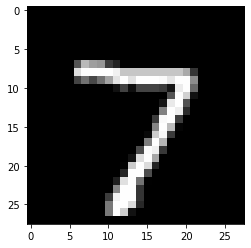

In [ ]:
#정답 이미지 확인
import matplotlib.pyplot as plt
plt.imshow(first_data, cmap = 'gray')
plt.show()